In [ ]:
pip install mrmr-selection

In [ ]:
!pip install boruta

In [ ]:
!pip install skrebate

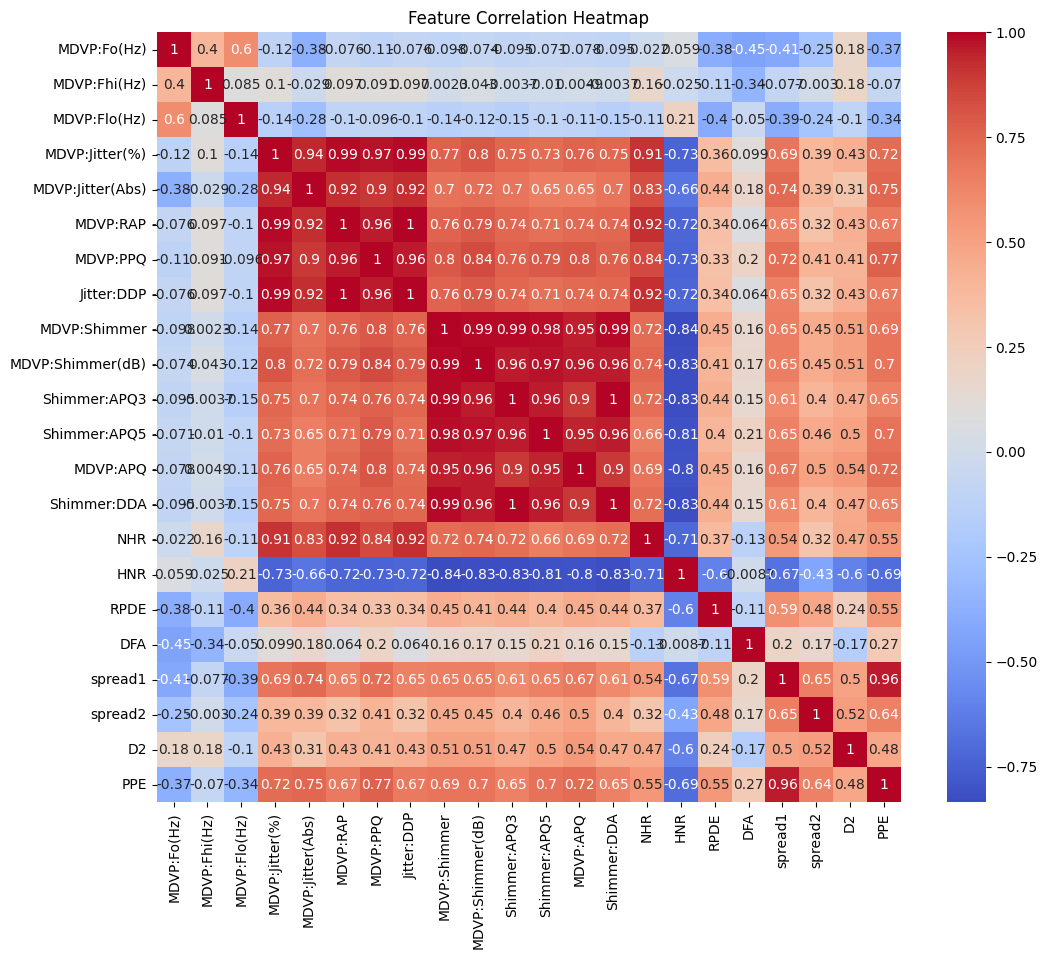

Boruta feature selection results:
[1 1 1 3 2 1 1 1 1 1 1 1 1 1 1 4 4 2 1 1 1 1]

RFE feature selection results:
[ 1  1  3 13 11  1  7  1  1  5  8  1  1  4  6  9 10 12  1  1  2  1]

RFECV feature selection results:
[ 1  3  7 17 15  5 11  2  4  9 12  1  1  8 10 13 14 16  1  1  6  1]

Chi2 feature selection results:
[4.31911959 0.96351509 6.01407496 2.46940099 2.88520414 2.22850674
 2.61083648 2.22759792 4.21534209 3.77465835 4.18788904 3.85307328
 3.35236987 4.18576878 1.49598689 1.50116908 1.92439718 0.88372961
 5.83205241 2.85383644 1.52725606 5.68001265]

Mutual_Info feature selection results:
[0.20659267 0.14071299 0.17408837 0.11510738 0.1903977  0.09374201
 0.10427903 0.09009646 0.10320017 0.10397835 0.10970328 0.11471116
 0.18351432 0.11043589 0.11911005 0.13246159 0.03700343 0.09511555
 0.22136783 0.19200151 0.01791333 0.25398246]

Relief feature selection results:
[0.0804522  0.03379202 0.02779589 0.02567475 0.02802878 0.02702065
 0.03056009 0.02700582 0.06018963 0.04999494 0.06

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.feature_selection import RFE, RFECV, SelectKBest, chi2, mutual_info_classif
from sklearn.preprocessing import MinMaxScaler
from skrebate import ReliefF
import seaborn as sns
from tqdm.notebook import tqdm

# Load the dataset
file_path = 'parkinsons.csv'
df = pd.read_csv(file_path)

# Select features and target
X = df.drop(['name', 'status'], axis=1)
y = df['status']

# Normalize features for algorithms that require normalized data
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Initialize random forest classifier
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

# Feature selection with Boruta
boruta_selector = BorutaPy(rf, n_estimators='auto', random_state=42)
boruta_selector.fit(X_normalized, y)
boruta_ranking = boruta_selector.ranking_

# Feature selection with RFE
rfe_selector = RFE(rf, n_features_to_select=10, step=1)
rfe_selector = rfe_selector.fit(X, y)
rfe_ranking = rfe_selector.ranking_

# Feature selection with RFECV
rfecv_selector = RFECV(rf, step=1, cv=5)
rfecv_selector = rfecv_selector.fit(X, y)
rfecv_ranking = rfecv_selector.ranking_

# Feature selection with SelectKBest using chi-squared
chi2_selector = SelectKBest(chi2, k=10)
chi2_selector.fit(X_normalized, y)
chi2_scores = chi2_selector.scores_

# Feature selection with SelectKBest using mutual information
mi_selector = SelectKBest(mutual_info_classif, k=10)
mi_selector.fit(X_normalized, y)
mi_scores = mi_selector.scores_

# Feature selection with ReliefF
relief_selector = ReliefF(n_neighbors=20)
relief_selector.fit(X_normalized, y)
relief_scores = relief_selector.feature_importances_

# Heatmap of correlations


import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Collect all feature selection results
feature_selection_results = {
    'Boruta': boruta_ranking,
    'RFE': rfe_ranking,
    'RFECV': rfecv_ranking,
    'Chi2': chi2_scores,
    'Mutual_Info': mi_scores,
    'Relief': relief_scores
}

# Output the feature selection results
for name, result in feature_selection_results.items():
    print(f'{name} feature selection results:\n{result}\n')

The feature selection process has been completed using various techniques, and the results are as follows:
Boruta:identified several features as important, with rankings where 1 indicates the most important features.
RFE (Recursive Feature Elimination): provided rankings for the features, with 1 being the most important.
RFECV (Recursive Feature Elimination with Cross-Validation): also ranked the features, with lower numbers indicating higher importance.
Chi-Squared: test provided scores for each feature, with higher scores indicating more importance.
Mutual Information: gave scores as well, where higher values suggest more relevance to the target variable.
ReliefF: algorithm assigned importance scores to each feature, with higher scores indicating more relevance.
The heatmap shows how each feature is correlated with the others, with warmer colors indicating stronger positive correlations and cooler colors indicating stronger negative correlations. This can help in understanding the interdependencies between features and in making decisions about which features to include in the model.



